# Voice Gender
## Gender Recognition by Voice and Speech Analysis

In [2]:
#데이터 설명

# This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. 
# The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. 
#The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

# The Dataset

# meanfreq: mean frequency (in kHz)
# sd: standard deviation of frequency
# median: median frequency (in kHz)
# Q25: first quantile (in kHz)
# Q75: third quantile (in kHz)
# IQR: interquantile range (in kHz)
# skew: skewness (see note in specprop description)
# kurt: kurtosis (see note in specprop description)
# sp.ent: spectral entropy
# sfm: spectral flatness
# mode: mode frequency
# centroid: frequency centroid (see specprop)
# peakf: peak frequency (frequency with highest energy)
# meanfun: average of fundamental frequency measured across acoustic signal
# minfun: minimum fundamental frequency measured across acoustic signal
# maxfun: maximum fundamental frequency measured across acoustic signal
# meandom: average of dominant frequency measured across acoustic signal
# mindom: minimum of dominant frequency measured across acoustic signal
# maxdom: maximum of dominant frequency measured across acoustic signal
# dfrange: range of dominant frequency measured across acoustic signal
# modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
# label: male or female

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv('./voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### null값과 shape 확인

In [5]:
df.isnull().sum() # 하나도 없음

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [6]:
df.shape

(3168, 21)

In [6]:
print("Total number of labels: {}".format(df.shape[0]))
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))

Total number of labels: 3168
Number of male: 1584
Number of female: 1584


### data 준비

In [7]:
#label을 제거
X=df.iloc[:, :-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [8]:
#label
y = df.iloc[:, -1]
y.unique()

array(['male', 'female'], dtype=object)

In [9]:
#데이터 scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [10]:
#train / test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### SVM으로 학습

In [11]:
from sklearn.svm import SVC
from sklearn import metrics #model evaluation 

In [12]:
#default linear
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9779179810725552


In [13]:
#default RBF kernel
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9763406940063092


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [14]:
#default polynomial kernel
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Score:
0.9589905362776026


### K-fold cross validation

In [15]:
#default linear
from sklearn.model_selection import cross_validate

svc=SVC(kernel='linear')
scores = cross_validate(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
np.mean(scores['test_score']) #교차검증 성능 평균(test set)

0.9694132632752168

In [16]:
#default RBF kernel
from sklearn.model_selection import cross_validate

svc=SVC(kernel='rbf')
scores = cross_validate(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
np.mean(scores['test_score']) #교차검증 성능 평균(test set)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

0.9659382214791815

In [17]:
#default polynomial kernel
from sklearn.model_selection import cross_validate

svc=SVC(kernel='poly')
scores = cross_validate(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
np.mean(scores['test_score']) #교차검증 성능 평균(test set)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

0.9457646684181196

### Hyperparameter search

- linear

In [18]:
#CV으로 하이퍼파라미터 알아보기
C_range=list(range(1,26))
acc_score = []
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_validate(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(np.mean(scores['test_score']))

In [19]:
print(np.mean(acc_score))

0.9684557758140275


Text(0, 0.5, 'Cross-Validated Accuracy')

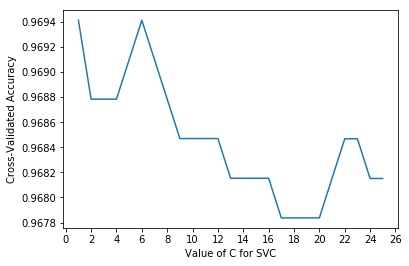

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [21]:
# C=1, 6부근에서 CV accuracy가 높다. 그 부분을 중점적으로 다시 해보자

In [22]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_validate(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(np.mean(scores['test_score']))

Text(0, 0.5, 'Cross-Validated Accuracy')

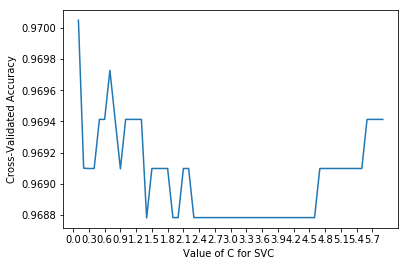

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(0.1,6,0.1)) #0.1부터 6까지 C를 0.1씩 증가
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [24]:
# 최적의 C=0.1

- RBF kernel

In [25]:
#RBF kernel의 하이퍼파라미터 C, gamma중 gamma만 해보자
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_validate(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(np.mean(scores['test_score']))

Text(0, 0.5, 'Cross-Validated Accuracy')

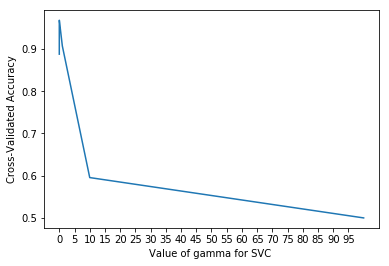

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

In [27]:
#accuracy가 가장 높은 gamma는 0.01
gamma_range[np.argmax(acc_score)]

0.01

In [28]:
#gammma 0.1을 주위로 더 자세하게 해보자
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_validate(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(np.mean(scores['test_score']))

Text(0, 0.5, 'Cross-Validated Accuracy')

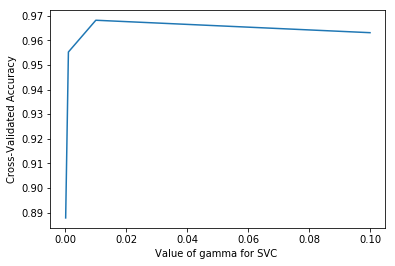

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [30]:
# 0.01부근에 accuracy가 높다.
# 0.01을 중심으로 몇개 더 해보면 0.01의 accuracy가 가장 높은걸 확인할 수 있음

### Hyperparameter search  -grid search

In [31]:
from sklearn.svm import SVC
svm_model= SVC()

In [32]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf']
                   }

In [33]:
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [34]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.9814522494080505


In [35]:
print(model_svm.best_params_)

{'C': 0.9, 'gamma': 0.05, 'kernel': 'rbf'}


In [36]:
from sklearn.svm import SVC
svc= SVC(C=0.9, gamma=0.05, kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9779179810725552


In [ ]:
# 이 커널을 참고해 실습코드를 만들었습니다.
# https://www.kaggle.com/nirajvermafcb/support-vector-machine-detail-analysis#Separating-features-and-labels

# 데이터 설명
# https://www.kaggle.com/primaryobjects/voicegender